In [7]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import cv2

from matplotlib import pylab as plt
import psdio

import warnings
warnings.filterwarnings("ignore")

In [12]:
psd_path     = "sample_31.psd"
psd_npy      = psdio.large_psd_to_npy(psd_path)
image, cells = psdio.get_masks_from_layer(psd_npy)

Unknown image resource 1092
Unknown key: b'CAI '
Unknown tagged block: b'CAI ', b'\x00\x00\x00\x03\x00\x00\x00\x10\x00\x00\x00\x01\x00\x00\x00\x00 ... =144'


In [14]:
image.shape, cells.shape ### one layer per cell -> Nr. of cells = Nr. of layers

((1080, 1080, 4), (220, 1080, 1080))

In [18]:
instance  = np.sum((cells.T*np.arange(1,len(cells)+1).T).T,0)
semantics = instance.astype(bool)

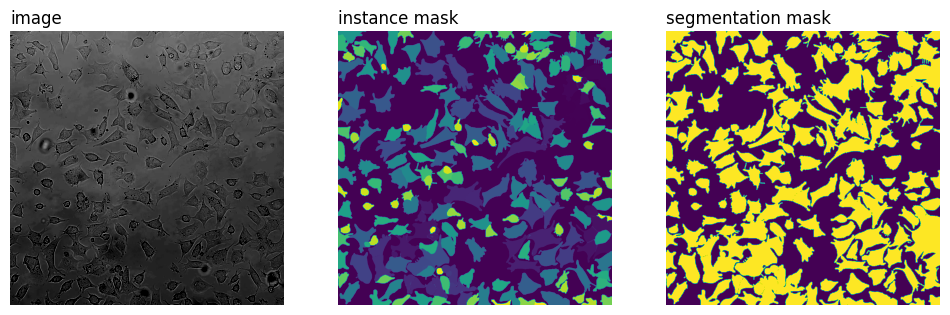

In [26]:
plt.figure(figsize=(12,6))
plt.subplot(131)
plt.imshow(image[:,:,0],"Greys_r",vmin=100,vmax=200)
plt.axis("off")
plt.title("image", loc="left")
plt.subplot(132)
plt.imshow(instance)
plt.axis("off")
plt.title("instance mask", loc="left")
plt.subplot(133)
plt.imshow(semantics)
plt.axis("off")
plt.title("segmentation mask", loc="left")
plt.show()